# 영화 추천 실습
## 루브릭
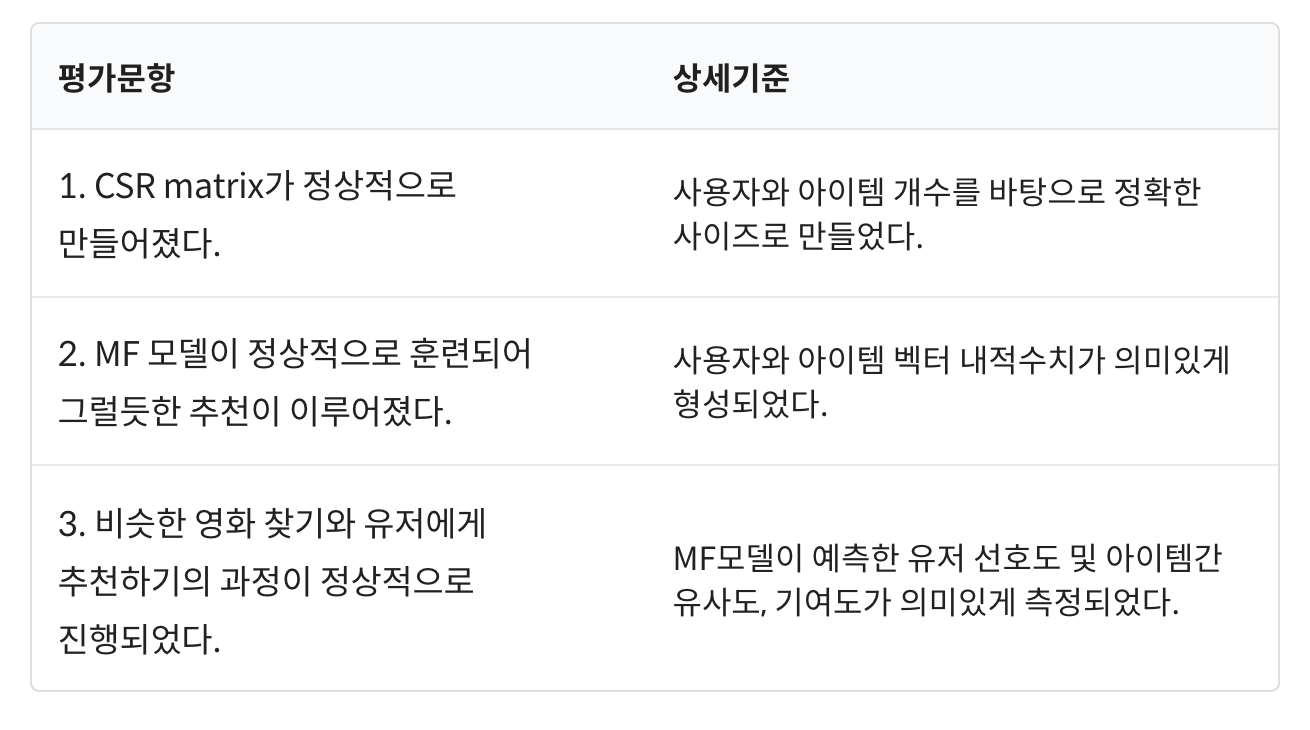

In [1]:
# get movielens data

import os
import pandas as pd

rating_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(rating_file_path, sep='::', names=ratings_cols, engine='python', encoding = "ISO-8859-1")
orginal_data_size = len(ratings)
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [2]:
# 3점 이상만 남깁니다.
ratings = ratings[ratings['rating']>=3]
filtered_data_size = len(ratings)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')

orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


In [3]:
# rating 컬럼의 이름을 count로 바꿉니다.
ratings.rename(columns={'rating':'count'}, inplace=True)

In [4]:
ratings['count']

0          5
1          3
2          3
3          4
4          5
          ..
1000203    3
1000205    5
1000206    5
1000207    4
1000208    4
Name: count, Length: 836478, dtype: int64

In [5]:
# 영화 제목을 보기 위해 메타 데이터를 읽어옵니다.
movie_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, sep='::', names=cols, engine='python', encoding='ISO-8859-1')
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
# 사용하는 컬럼만 남겨줍니다.
using_cols = ['movie_id', 'title']
data = movies[using_cols]
data.head(10)

,movie_id,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
5,6,Heat (1995)
6,7,Sabrina (1995)
7,8,Tom and Huck (1995)
8,9,Sudden Death (1995)
9,10,GoldenEye (1995)


In [7]:
# 데이터 병합
df = data.set_index('movie_id')
ratings = ratings.join(df, on = 'movie_id')
ratings.head()

,user_id,movie_id,count,timestamp,title
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975)
1,1,661,3,978302109,James and the Giant Peach (1996)
2,1,914,3,978301968,My Fair Lady (1964)
3,1,3408,4,978300275,Erin Brockovich (2000)
4,1,2355,5,978824291,"Bug's Life, A (1998)"


In [8]:
# unique movie counts in ratings
movieUniqueCount = ratings['title'].nunique()
movieUniqueCount

3628

In [9]:
# unique user counts in ratings
userUniqueCount =ratings['user_id'].nunique()
userUniqueCount

6039

In [10]:
# 인기많은 영화 top30
movieCount30=ratings.groupby('title')['user_id'].count()
movieCount30.sort_values(ascending=False).head(30)

title
American Beauty (1999)                                   3211
Star Wars: Episode IV - A New Hope (1977)                2910
Star Wars: Episode V - The Empire Strikes Back (1980)    2885
Star Wars: Episode VI - Return of the Jedi (1983)        2716
Saving Private Ryan (1998)                               2561
Terminator 2: Judgment Day (1991)                        2509
Silence of the Lambs, The (1991)                         2498
Raiders of the Lost Ark (1981)                           2473
Back to the Future (1985)                                2460
Matrix, The (1999)                                       2434
Jurassic Park (1993)                                     2413
Sixth Sense, The (1999)                                  2385
Fargo (1996)                                             2371
Braveheart (1995)                                        2314
Men in Black (1997)                                      2297
Schindler's List (1993)                                  2257
Pr

## 선호하는 5가지 rating 추가해주기

In [11]:
## 인덱스와 영화명으로 서로 반환할 수 있는 딕셔너리를 생성합니다.
idx_to_movie = {i:v for i,v in zip(movies['movie_id'], movies['title'])}
movie_to_idx = {v:i for i,v in zip(movies['movie_id'], movies['title'])}

# 내 취향 입력해주기
my_favorite = ['American Beauty (1999)', 'Ghostbusters (1984)','Toy Story (1995)',
             'Braveheart (1995)','Jurassic Park (1993)' ]

# 내 임의 아이디
my_uniqueId = 9996

#선택한 영화 인덱스 화
my_idx = []
for i in my_favorite:
    my_idx.append(movie_to_idx[i])
my_idx

my_playlist = pd.DataFrame({'user_id': [my_uniqueId]*5,'movie_id':my_idx, 'title': my_favorite, 'count':[5]*5})

if not ratings.isin({'user_id':[my_uniqueId]})['user_id'].any():  # user_id에 나의 데이터가 없다면
    ratings = ratings.append(my_playlist)                           # 위에 임의로 만든 my_favorite 데이터를 추가해 줍니다. 

ratings.tail(10)       # 잘 추가되었는지 확인해 봅시다.

,user_id,movie_id,count,timestamp,title
1000203,6040,1090,3,956715518.0,Platoon (1986)
1000205,6040,1094,5,956704887.0,"Crying Game, The (1992)"
1000206,6040,562,5,956704746.0,Welcome to the Dollhouse (1995)
1000207,6040,1096,4,956715648.0,Sophie's Choice (1982)
1000208,6040,1097,4,956715569.0,E.T. the Extra-Terrestrial (1982)
0,9996,2858,5,NaN,American Beauty (1999)
1,9996,2716,5,NaN,Ghostbusters (1984)
2,9996,1,5,NaN,Toy Story (1995)
3,9996,110,5,NaN,Braveheart (1995)
4,9996,480,5,NaN,Jurassic Park (1993)


In [12]:
# 고유한 유저, 아티스트를 찾아내는 코드
user_unique = ratings['user_id'].unique()
movie_unique = ratings['title'].unique()

# 유저, 아티스트 indexing 하는 코드 idx는 index의 약자입니다.
user_to_idx = {v:k for k,v in enumerate(user_unique)}
movie_to_idx = {v:k for k,v in enumerate(movie_unique)}

In [13]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 봅시다. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거합니다. 
temp_user_data = ratings['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(ratings):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    ratings['user_id'] = temp_user_data   # data['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# artist_to_idx을 통해 title 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_movie_data = ratings['title'].map(movie_to_idx.get).dropna()
if len(temp_movie_data) == len(ratings):
    print('title column indexing OK!!')
    ratings['title'] = temp_movie_data
else:
    print('title column indexing Fail!!')

data

user_id column indexing OK!!
title column indexing OK!!


,movie_id,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
3878,3948,Meet the Parents (2000)
3879,3949,Requiem for a Dream (2000)
3880,3950,Tigerland (2000)
3881,3951,Two Family House (2000)


In [14]:
#CSR matrix 

from scipy.sparse import csr_matrix

num_user = ratings['user_id'].nunique()
num_movie = ratings['movie_id'].nunique()

csr_data = csr_matrix((ratings['count'], (ratings.user_id, ratings.movie_id)))
csr_data

<6040x3953 sparse matrix of type '<class 'numpy.longlong'>'
	with 836483 stored elements in Compressed Sparse Row format>

In [15]:
# 모델 구성 및 트레이닝

from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분입니다. 학습 내용과는 무관합니다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<3953x6040 sparse matrix of type '<class 'numpy.longlong'>'
	with 836483 stored elements in Compressed Sparse Column format>

In [16]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

In [17]:
# 내가 선택한 5개의 영화와 새로 선택한 영화와의 선호도
my_uniqueId,my_choice = user_to_idx[my_uniqueId], movie_to_idx['Meet the Parents (2000)']

my_vector, choice_vector = als_model.user_factors[my_uniqueId], als_model.item_factors[my_choice]

# 내적하기
np.dot(my_vector, choice_vector)

-0.027364012

유사도는 상당히 낮게 나왔다. 관련성이 떨어지는 영화인 것 같다.

In [18]:
# 내가 좋아하는 영화와 비슷한 영화 추천 받기
recommendMovie = als_model.recommend(my_uniqueId, csr_data, N=20, filter_already_liked_items=True)
recommendMovie

[(2028, 0.48139882),
 (3114, 0.46338665),
 (589, 0.4442111),
 (1580, 0.41251457),
 (2355, 0.3946342),
 (2396, 0.371799),
 (1270, 0.3632921),
 (2997, 0.3506827),
 (1259, 0.33559757),
 (2762, 0.32873666),
 (356, 0.3263473),
 (2791, 0.3245113),
 (2571, 0.29900062),
 (34, 0.2967435),
 (1265, 0.26307866),
 (1197, 0.25452387),
 (457, 0.24552056),
 (1097, 0.23425229),
 (2599, 0.2318615),
 (908, 0.20481446)]

movie_id를 title로 변환해서 보기

In [19]:
[idx_to_movie[i[0]] for i in recommendMovie]

['Saving Private Ryan (1998)',
 'Toy Story 2 (1999)',
 'Terminator 2: Judgment Day (1991)',
 'Men in Black (1997)',
 "Bug's Life, A (1998)",
 'Shakespeare in Love (1998)',
 'Back to the Future (1985)',
 'Being John Malkovich (1999)',
 'Stand by Me (1986)',
 'Sixth Sense, The (1999)',
 'Forrest Gump (1994)',
 'Airplane! (1980)',
 'Matrix, The (1999)',
 'Babe (1995)',
 'Groundhog Day (1993)',
 'Princess Bride, The (1987)',
 'Fugitive, The (1993)',
 'E.T. the Extra-Terrestrial (1982)',
 'Election (1999)',
 'North by Northwest (1959)']

추천받은 영화리스트를 보니 좋아할만 영화들이 제법 보인다.

## 정리
처음에 사용 유저에 대한 데이터가 제로베이스인 상태에서 추천을 해줄 수 없어 따로  
입력한 취향 다섯개로 다른 유저나 아이템의 연관성을 따져 높은 유사도 순으로 추천을 받는 개념에 대한 이해와 실험을 해본 시간이었다.  
하지만 이 부분을 가지고 계속 추천한다면 비슷한 장르의 영화만 추천받을 것이다.  
그래서 추가적으로 해당 유저에 관한 로그데이터를 수집하고 이를 기반으로 분석, 가공하여 추천 스코어링에 반영하는데 많은 노력을 하여 유저에게 보다 나은 추천 결과를 전달해야 할 것이다.
